# Описание и цели проекта

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
**Цель:**  
Сделать предварительный анализ тарифов на небольшой выборке клиентов. Также провести исследование "портрета": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1. Импорт библиотек. Предварительное изучение данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

Прочитаем данные из файлов и изучем общую информацию.

In [ ]:
def description(name):
    display(name.head())
    display(name.info())
    display(name.describe())
    print('Количество дубликатов:', name.duplicated().sum())

1. Данные пользователей.

In [ ]:
user_data = pd.read_csv('/datasets/users.csv')
description(user_data)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Количество дубликатов: 0


В столбце "churn_date" есть пропуски. Они связаны с тем, что на момент выгрузки данных пользователи продолжали использовать тариф. 

2. Данные о звонках

In [ ]:
calls_data = pd.read_csv('/datasets/calls.csv')
description(calls_data)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Количество дубликатов: 0


3. Данные об отправленных сообщениях

In [ ]:
messages_data = pd.read_csv('/datasets/messages.csv')
description(messages_data)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Количество дубликатов: 0


4. Данные об интернет-сессиях

In [ ]:
internet_data = pd.read_csv('/datasets/internet.csv')
description(internet_data)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Количество дубликатов: 0


В данных об интернет-сессиях столбец с именем "Unnamed: 0" содержит числа от 0 до 149395 полностью дублируя индексы датафрейма. Вероятно это связано с технической ошибкой выгрузки данных. Для дальнейшей работы нужно будет избавиться от этого столбца, чтобы исключить ошибки в дальнейшем.

5. Данные о тарифах

In [ ]:
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
description(tariffs_data)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Количество дубликатов: 0


Поменяем название столбца tariff_name на tariff, как в таблице user_data для дальнейшего объединения.

In [ ]:
tariffs_data.rename(columns={'tariff_name': 'tariff'}, inplace=True)

### Вывод

Были загружены и получена первичная сводная информация по предоставленным данным. Дубликатов в данных не обнаружено. Все числа имеют тип данных float или int, что позволяет проводить с ними математические операции. Для дальнейшего исследователького анализа приведем дату к типу данных datetime, удалим дублирующие столбцы. Также округлим минуты и мегабайты в соответствии с тарифом и проведем необходимые расчеты с определением помесячной выручки с каждого пользователя. 

## 2. Предобработка данных

Удалим дублирующий столбец Unnamed: 0 в датафрейме internet_data

In [ ]:
internet_data.drop('Unnamed: 0', axis=1, inplace=True)

У нас в каждом наборе данных дата имеет тип object. Поменяем на нужный формат даты datetime.

In [ ]:
user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], yearfirst=True)
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], yearfirst=True)
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], yearfirst=True)
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], yearfirst=True)

In [ ]:
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
def rounding(x):
    if x > round(x):
        return round(x+1)
    return round(x)

Добавим в calls_data новый столбец с длительностью разговора округленного до минут в соответствии с тарифом.

In [ ]:
calls_data['duration_tariff'] = calls_data['duration'].apply(rounding)

Добавим новый столбец, куда запишем месяц в котором была какая-либо операция по тарифу.

In [ ]:
calls_data['month'] = calls_data['call_date'].dt.month
messages_data['month'] = messages_data['message_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month

Рассчитаем количество звонков по каждому месяцу для всех пользователей.

In [ ]:
calls_data_group = calls_data.groupby(['month', 'user_id'])['duration_tariff']\
.agg(['count', 'sum'])\
.reset_index()
calls_data_group.head()

,month,user_id,count,sum
0,1,1005,15,95
1,1,1032,61,380
2,1,1045,1,9
3,1,1055,64,551
4,1,1071,24,194


In [ ]:
calls_data_group.isna().sum()

month      0
user_id    0
count      0
sum        0
dtype: int64

Изменим названия столбцов в сводной таблице.

In [ ]:
calls_data_group.rename(columns={'count': 'count_calls', 'sum': 'sum_duration_min'}, inplace=True)
calls_data_group.head()

,month,user_id,count_calls,sum_duration_min
0,1,1005,15,95
1,1,1032,61,380
2,1,1045,1,9
3,1,1055,64,551
4,1,1071,24,194


Количество сообщений в месяц

In [ ]:
messages_data.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [ ]:
messages_data_group = messages_data.groupby(['month', 'user_id'])['id']\
.agg('count')\
.reset_index()\
.rename(columns={'id': 'count_messages_inmonth'})
messages_data_group.head()

,month,user_id,count_messages_inmonth
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16


In [ ]:
internet_data.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [ ]:
internet_data_group = internet_data.groupby(['month', 'user_id'])['mb_used']\
.sum()\
.reset_index()\
.rename(columns={'mb_used': 'mb_used_inmonth'})
internet_data_group.head()

,month,user_id,mb_used_inmonth
0,1,1005,2727.97
1,1,1032,24127.69
2,1,1045,2346.71
3,1,1055,17090.88
4,1,1071,15604.34


Добавим в датафрейм новый столбец с объемом трафика в гигабайтах, округленных в большую сторону в соответствии с тарифом за перерасход.

In [ ]:
internet_data_group['gb_total_month'] = np.ceil(internet_data_group['mb_used_inmonth']/1024)
internet_data_group['gb_total_month'] = internet_data_group['gb_total_month'].astype('int')

In [ ]:
internet_data_group.head()

,month,user_id,mb_used_inmonth,gb_total_month
0,1,1005,2727.97,3
1,1,1032,24127.69,24
2,1,1045,2346.71,3
3,1,1055,17090.88,17
4,1,1071,15604.34,16


Теперь объединим сводные таблицы по месяцу и user_id для того, чтобы дальше работать с одной таблицей. Это необходимо, чтобы посчитать выручку по месяцу для каждого пользователя.

In [ ]:
data_total = calls_data_group.merge(messages_data_group, how='outer', on=['month', 'user_id'])
data_total.head()

,month,user_id,count_calls,sum_duration_min,count_messages_inmonth
0,1,1005,15.0,95.0,7.0
1,1,1032,61.0,380.0,38.0
2,1,1045,1.0,9.0,5.0
3,1,1055,64.0,551.0,30.0
4,1,1071,24.0,194.0,16.0


In [ ]:
data_total = data_total.merge(internet_data_group, on=['month', 'user_id'], how='outer')

Получим итоговую таблицу data_total, соеденив с данными о пользователях и тарифах, которым они подключены.

In [ ]:
data_total = data_total.merge(user_data, how='outer', on='user_id')

In [ ]:
data_total = data_total.merge(tariffs_data, how='left', on='tariff')

In [ ]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
month                     3214 non-null float64
user_id                   3216 non-null int64
count_calls               3174 non-null float64
sum_duration_min          3174 non-null float64
count_messages_inmonth    2717 non-null float64
mb_used_inmonth           3203 non-null float64
gb_total_month            3203 non-null float64
age                       3216 non-null int64
churn_date                189 non-null object
city                      3216 non-null object
first_name                3216 non-null object
last_name                 3216 non-null object
reg_date                  3216 non-null datetime64[ns]
tariff                    3216 non-null object
messages_included         3216 non-null int64
mb_per_month_included     3216 non-null int64
minutes_included          3216 non-null int64
rub_monthly_fee           3216 non-null int64
rub_per_gb                3216 non-null 

Посмотрим итоговую таблицу на пропуски.

In [ ]:
data_total.isna().sum()

month                        2
user_id                      0
count_calls                 42
sum_duration_min            42
count_messages_inmonth     499
mb_used_inmonth             13
gb_total_month              13
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff                       0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

В таблице есть пропуски в столбце month. Это очень странно потому что все операции датируются и этот столбец есть во всех исходных таблицах. Посмотрим на эти строчки.

In [ ]:
data_total[data_total['month'].isnull()]

,month,user_id,count_calls,sum_duration_min,count_messages_inmonth,mb_used_inmonth,gb_total_month,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,NaN,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,...,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,NaN,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,...,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Видно, что эти пользователи зарегистрировались в конце года. Возможно получили в подарок от оператора и не успели воспользоваться или не планируют пользоваться (сам так делал =)). Уберем этих пользователей из таблицы. 

In [ ]:
data_total.dropna(subset=['month'], axis='index', inplace=True)

In [ ]:
data_total.isna().sum()

month                        0
user_id                      0
count_calls                 40
sum_duration_min            40
count_messages_inmonth     497
mb_used_inmonth             11
gb_total_month              11
age                          0
churn_date                3027
city                         0
first_name                   0
last_name                    0
reg_date                     0
tariff                       0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

Заполним остальные пропуски нулем, так как очевидно, что эти пропуски характеризуют отсутствие операций по тарифу.

In [ ]:
data_total[['count_calls', 'sum_duration_min', 'count_messages_inmonth', 'mb_used_inmonth', 'gb_total_month']] = data_total[['count_calls', 'sum_duration_min', 'count_messages_inmonth', 'mb_used_inmonth', 'gb_total_month']].fillna(0)

Осталось изменить тип данных в столбце churn_date на datetime, но сначала заполним пропуски на последнюю дату года 2018 года. Так мы будем знать, что эта дата соответствует пользователям, которые использовали тариф в течении этого периода и не ушли от оператора. 

In [ ]:
data_total['churn_date'] = data_total['churn_date'].fillna('2018-12-31')

In [ ]:
data_total['churn_date'] = pd.to_datetime(data_total['churn_date'], yearfirst=True)

Проверим все изменения.

In [ ]:
data_total.isna().sum()

month                     0
user_id                   0
count_calls               0
sum_duration_min          0
count_messages_inmonth    0
mb_used_inmonth           0
gb_total_month            0
age                       0
churn_date                0
city                      0
first_name                0
last_name                 0
reg_date                  0
tariff                    0
messages_included         0
mb_per_month_included     0
minutes_included          0
rub_monthly_fee           0
rub_per_gb                0
rub_per_message           0
rub_per_minute            0
dtype: int64

Теперь посчитаем выручку с каждого пользователя по каждому месяцу.

In [ ]:
data_total.head()

,month,user_id,count_calls,sum_duration_min,count_messages_inmonth,mb_used_inmonth,gb_total_month,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1.0,1005,15.0,95.0,7.0,2727.97,3.0,67,2018-12-31,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,2.0,1005,69.0,456.0,38.0,7383.93,8.0,67,2018-12-31,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
2,3.0,1005,77.0,607.0,56.0,11104.25,11.0,67,2018-12-31,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
3,4.0,1005,101.0,712.0,41.0,9351.72,10.0,67,2018-12-31,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
4,5.0,1005,73.0,595.0,42.0,7865.53,8.0,67,2018-12-31,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3


In [ ]:
def func(row):
    minutes = row['sum_duration_min'] - row['minutes_included']
    messages = row['count_messages_inmonth'] - row['messages_included']
    internet = row['gb_total_month'] - (row['mb_per_month_included']/1024)
    if minutes < 0:
        minutes = 0
    if messages < 0:
        messages = 0
    if internet < 0:
        internet = 0
    value = minutes * row['rub_per_minute'] + messages * row['rub_per_message'] + internet * row['rub_per_gb'] + row['rub_monthly_fee']
    return value

Применим функцию к нашему датафрейму

In [ ]:
data_total['revenue_month'] = data_total.apply(func, axis=1)

In [ ]:
data_total['revenue_month']

0        550.0
1        550.0
2        889.0
3       1186.0
4        835.0
         ...  
3209    1150.0
3210     950.0
3211    1950.0
3212    2700.0
3213    3300.0
Name: revenue_month, Length: 3214, dtype: float64

Проверим расчеты по строчке с индексом 2.

In [ ]:
data_total.loc[2, :]

month                                       3
user_id                                  1005
count_calls                                77
sum_duration_min                          607
count_messages_inmonth                     56
mb_used_inmonth                       11104.2
gb_total_month                             11
age                                        67
churn_date                2018-12-31 00:00:00
city                         Набережные Челны
first_name                           Афанасий
last_name                              Горлов
reg_date                  2018-01-25 00:00:00
tariff                                  smart
messages_included                          50
mb_per_month_included                   15360
minutes_included                          500
rub_monthly_fee                           550
rub_per_gb                                200
rub_per_message                             3
rub_per_minute                              3
revenue_month                     

Результат = 889 руб Афанасий заплатил в марте, что сходится с работой фукнции.

Теперь сделаем удобный порядок стобцов. Чтобы вначале были столбцы, которые далее понадобятся нам для работы.

In [ ]:
cols = data_total.columns.tolist()
cols

['month',
 'user_id',
 'count_calls',
 'sum_duration_min',
 'count_messages_inmonth',
 'mb_used_inmonth',
 'gb_total_month',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff',
 'messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute',
 'revenue_month']

In [ ]:
data_total = data_total[[
 'month',
 'user_id',
 'count_calls',
 'sum_duration_min',
 'count_messages_inmonth',
 'gb_total_month',
 'revenue_month',
 'mb_used_inmonth',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff',
 'messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute'
 ]]

In [ ]:
data_total['month'] = data_total['month'].astype('int')

In [ ]:
data_total.head()

,month,user_id,count_calls,sum_duration_min,count_messages_inmonth,gb_total_month,revenue_month,mb_used_inmonth,age,churn_date,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,15.0,95.0,7.0,3.0,550.0,2727.97,67,2018-12-31,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,2,1005,69.0,456.0,38.0,8.0,550.0,7383.93,67,2018-12-31,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
2,3,1005,77.0,607.0,56.0,11.0,889.0,11104.25,67,2018-12-31,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
3,4,1005,101.0,712.0,41.0,10.0,1186.0,9351.72,67,2018-12-31,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
4,5,1005,73.0,595.0,42.0,8.0,835.0,7865.53,67,2018-12-31,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3


### Вывод

Полученные на исследование данные были агрегированы: получены общие расходы по тарифу за месяц для каждого пользователя. Итоговая таблица data_total содержит все необходимые данные для проверки гипотез. На данном этапе можно считать, что предоставленные данные готовы для дальнейшего анализа и решения поставленной задачи. Напомним, что нам нужно выбрать наиболее выгодный, с точки зрения прибыли, тариф для того, чтобы отдел маркетинга спланировали бюджет продвижения. 

## 3. Исследование даных

Посмотрим на поведение клиентов оператора. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение.

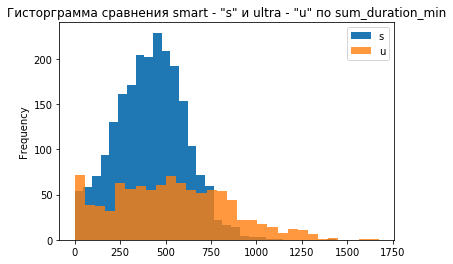

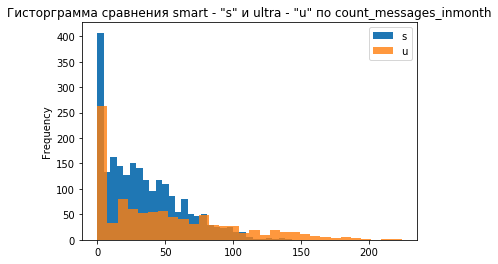

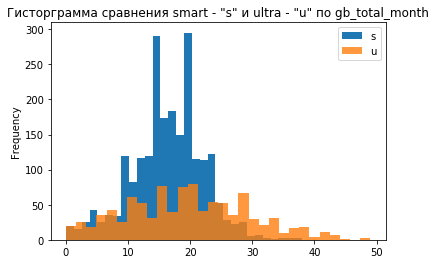

In [ ]:
colum_list = ['sum_duration_min', 'count_messages_inmonth', 'gb_total_month']
for column in colum_list:
    data_total.query('tariff == "smart"')[column].plot(kind='hist', bins=30)
    data_total.query('tariff == "ultra"')[column].plot(kind='hist', bins=30, alpha=0.8)
    plt.title('Гисторграмма сравнения smart - "s" и ultra - "u" по ' + column)
    plt.legend('su')
    plt.show()
    #display(data[column].describe())

Из гистограмм видно, что в целом виды распределения совпадают у обоих тарифов. Пользователи тарифа ultra не привязаны к ограничению в тарифе, поэтому распределения по количеству потраченных минут имеет более тяжелый "хост" вплоть до 1500 мин, тогда, как на тарифе smart практически все количество данных лежит до 1000 мин.

Посмотрим на статистические показатели

Статистические показатели smart
count    2229.000000
mean      418.165994
std       190.407345
min         0.000000
25%       282.000000
50%       422.000000
75%       546.000000
max      1435.000000
Name: sum_duration_min, dtype: float64

Статистические показатели ultra
count     985.000000
mean      526.920812
std       317.779487
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1674.000000
Name: sum_duration_min, dtype: float64

Статистические показатели smart
count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages_inmonth, dtype: float64

Статистические показатели ultra
count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count_messages_inmonth, dtype: float64

Статистические показатели smart
coun

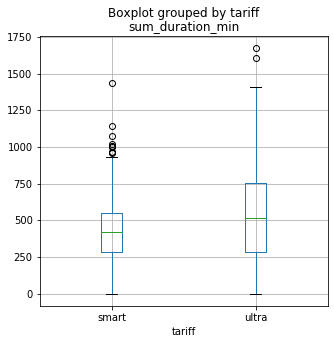

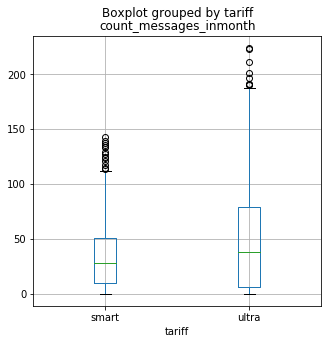

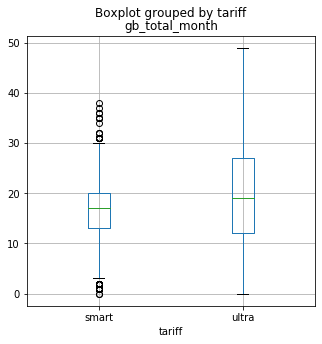

In [ ]:
for col in colum_list:
    print('Статистические показатели smart')
    print(data_total.query('tariff == "smart"')[col].describe())
    print()
    print('Статистические показатели ultra')
    print(data_total.query('tariff == "ultra"')[col].describe())
    print()
    data_total.boxplot(col, by='tariff', figsize=(5, 5))

По диаграме разброса подверждается наша гипотеза о том, что пользователи тарифа ultra имеют более широкое распределение значений. 

### Вывод

В ходе исследовательского анализа были обнаружены отличия в поведении пользователей тарфиов smart и ultra:
- Пользователи тарифа smart имеют ограничения в рамках тарифа в значениях количество минут: 500 мин, количество сообщений: 50 и объем трафика: 15 Гб. Ввиду этих ограничений около 70 % пользователей этого тарифа используют его бесплатный лимит для звонков и смс. Пик гистограммы распределения значений приходится на границу значений по тарифу. Примечательно, что за пределы лимита по использованию интернета выходят более 50 % пользователей и соответственно платят за перерасход. 
- Пользователи тарифа ultra имеют ограничения в рамках тарифа в значениях количество минут: 3000 мин, количество сообщений: 1000 и объем трафика: 30 Гб. Практически 100 % пользователей данного тарифа остаются в рамках лимита по звонкам и смс. Только по объему трафика за пределы лимита выходят около 20% пользователей и платят за перерасход. 

## Проверка гипотез

В данном разделе на основе статистических показателей выясним, как отличается выручка по пользователям разных тарифов smart и ultra. Также посмотрим, как средняя выручка по пользователям из Москвы отличается от выручки по пользователям из других регионов.

Для начала вызуально оценим, как распределяются данные  по выручке по интересующим нас условиям.

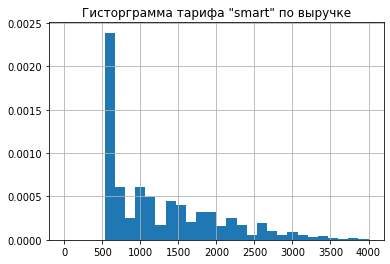

Text(0.5, 1.0, 'Гисторграмма тарифа "ultra" по выручке')

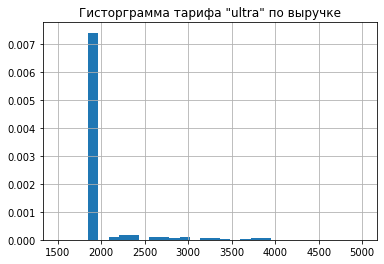

In [ ]:
data_total.query('tariff == "smart"')['revenue_month'].hist(density=True, range=(0, 4000), bins=30)
plt.title('Гисторграмма тарифа "smart" по выручке')
plt.show()
data_total.query('tariff == "ultra"')['revenue_month'].hist(density=True, range=(1500, 5000), bins=30)
plt.title('Гисторграмма тарифа "ultra" по выручке')

По распределению данных относительно выручки выидно, что пользователи тарифа smart чаще переплачивают сверх тарифного плана. В то же время пользователи тарифа ultra с большей вероятностью укладываются в лимиты тарифа. 

Посмотрим на среднее и стандартное отклонение.

In [ ]:
data_total.query('tariff == "smart"')['revenue_month'].describe()

count    2229.000000
mean     1290.335576
std       818.543215
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: revenue_month, dtype: float64

In [ ]:
data_total.query('tariff == "ultra"')['revenue_month'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue_month, dtype: float64

По статичстическим показателям видно, как отличаются распределения по 2-м тарифам. В том числе стандартное отклонение отличается более, чем в 2 раза. Это дает нам сигнал о том, что мы сравниваем 2 независимые выборки. Поэтому мы будем проверять гипотезу о равенстве средних двух независимых генеральных совокупностей с отличающимися дисперсиями. Эти выводы подводят нас к определенному методу для проверки выдвинутых гипотез. 

Для сравнения 2-х независимых выборок будем использовать t-критерий Стьюдента.

Сформулируем нулевую и альтернативную гипотезы о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза H0: средняя выручка пользователей тарифа smart и ultra равны.
Альтернативная гипотеза H1: средняя выручка пользователей тарифа smart и ultra не равны.

По гистограммам было видно, что в наших сраниваемых наборах данных присутствуют выбросы. Так как статистические показатели чувствительны к выбросам для начала нам нужно отфильтровать наш датасет и сравнивать уже очищенные данные. 

In [ ]:
q1 = data_total['revenue_month'].quantile(0.25)
q3 = data_total['revenue_month'].quantile(0.75)
iqr = q3-q1
smart = data_total.query('tariff == "smart" and revenue_month < (@q3 + 1.5*@iqr) and revenue_month > (@q1 - 1.5*@iqr)')
ultra = data_total.query('tariff == "ultra" and revenue_month < (@q3 + 1.5*@iqr) and revenue_month > (@q1 - 1.5*@iqr)')

Проверям:

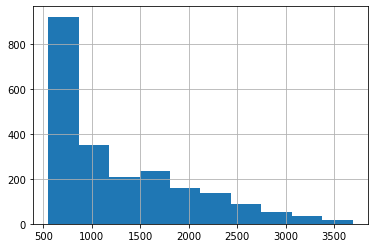

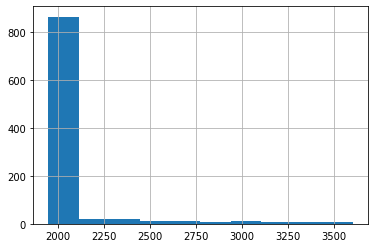

In [ ]:
smart['revenue_month'].hist()
plt.show()
ultra['revenue_month'].hist()

Проверяем гипотезу. Зададим уровень статистической значимости равным 0,05. Если вероятность p-value > 0.05, то гипотезу не отвергаем, а если меньше, то отвергаем и это будет говорить нам о том, что средняя выручка по пользователям разных тарифов отличается! 

In [ ]:
alpha = 0.05
comparing_tariff = st.ttest_ind(smart['revenue_month'], ultra['revenue_month'])
print('Вероятность равенства выручки двух тарифов равна: ', comparing_tariff.pvalue)

Вероятность равенства выручки двух тарифов равна:  6.39772647487267e-196


In [ ]:
if comparing_tariff.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Это было видно и без сравнения, но все же мы проверили статистическим методом вероятность равенства 2-х генеральных совокупностей. Как видно из результата такая вероятность стремиться к нулю или простыми словами: выручка по пользователям разных тарифов сильно отличается!

Пользователи тарифа ultra с большей вероятностью принесут компании больше выручки, чем пользователи тарифа smart даже с учетом того, что пользователи этого тарифа постоянно перепачивают сверх лимита.

Теперь проверим, как локация пользователей влияет на выручку.

Нулевая гипотеза: Средняя вырчка по пользователям из Москвы и других регионов равна. Альтернативная гипотеза: Средняя вырчка по пользователям из Москвы и других регионов отличается.

In [ ]:
data_total['city'].unique()

array(['Набережные Челны', 'Ульяновск', 'Улан-Удэ', 'Казань', 'Омск',
       'Чита', 'Краснодар', 'Санкт-Петербург', 'Красноярск',
       'Архангельск', 'Ставрополь', 'Кострома', 'Волгоград', 'Тамбов',
       'Москва', 'Киров', 'Ростов-на-Дону', 'Уфа', 'Вологда', 'Пенза',
       'Магнитогорск', 'Иркутск', 'Орёл', 'Астрахань', 'Подольск',
       'Ярославль', 'Новокузнецк', 'Нижний Тагил', 'Мурманск', 'Самара',
       'Воронеж', 'Пермь', 'Саранск', 'Новосибирск', 'Владивосток',
       'Нижний Новгород', 'Новороссийск', 'Брянск', 'Челябинск',
       'Калининград', 'Барнаул', 'Якутск', 'Тольятти', 'Курган', 'Томск',
       'Балашиха', 'Саратов', 'Петрозаводск', 'Тюмень', 'Курск', 'Тула',
       'Сочи', 'Оренбург', 'Смоленск', 'Хабаровск', 'Рязань', 'Махачкала',
       'Тверь', 'Ижевск', 'Чебоксары', 'Белгород', 'Череповец',
       'Стерлитамак', 'Владимир', 'Волжский', 'Калуга', 'Екатеринбург',
       'Севастополь', 'Нижневартовск', 'Грозный', 'Владикавказ', 'Химки',
       'Сургут', 'Липе

In [ ]:
moscow = data_total.query('city == "Москва" and revenue_month < (@q3 + 1.5*@iqr) and revenue_month > (@q1 - 1.5*@iqr)')['revenue_month']
other_city = data_total.query('city != "Москва" and revenue_month < (@q3 + 1.5*@iqr) and revenue_month > (@q1 - 1.5*@iqr)')['revenue_month']

In [ ]:
comparing_city = st.ttest_ind(moscow, other_city)
print('Вероятность равенства выручки в Москве и других регионах: ', comparing_city.pvalue)

Вероятность равенства выручки в Москве и других регионах:  0.18319549980221056


In [ ]:
if comparing_city.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не отвергаем нулевую гипотезу")

Не отвергаем нулевую гипотезу


Отбросить гипотезу о том, что выручка по пользователям из Москвы и других регионов равна нельзя. Что говорит нам о том, что в целом нет различия в том, где находятся наши пользователи, гораздо важнее каким тарифом он пользуется. Наиболее выгодный для компании тариф и предстоит рекламировать отделу маркетинга.

На сколько процентов отличаются средние значения для разных тарифов.

In [ ]:
smart['revenue_month'].mean() / ultra['revenue_month'].mean() * 100

61.51576556284179

### Вывод

В данном разделе нашего исследования были проверены гипотезы относительно вида тарифа и локации пользователей. Было выявлено, что пользователи тарифа ultra с большей вероятностью принесут компании больше выручки, чем пользователи тарифа smart. Это связано с изначально высокой стоимостью ежемесячного платежа. Переплаты сверх тарифа ultra оказывают минимальный эффект на среднюю выручку пользователя. Также была проверена гипотеза относительно локации пользователя. Здесь результат позволяет нам сказать, что с большей вероятностью, что пользователи Москвы и других регионов в среднем тратят на мобильную связь одинаковую сумму. 

## 4. Общие выводы

Целью даного исследования было определения наиболее выгодного для компании тарифа. В ходе исследования были сделаны следующие выводы:
- Полученные данные были предобработаны и объеденены в общую таблицу. В данных были обнаружены пользователи, которые не провели ни одну операцию по симкарте. Данные по этим пользователям были удалены из общей таблице. 
- Поведенчиские модели сильно отличаются в зависимости от тарифа пользователя. Пользователи тарифа smart имеют ограничения в рамках тарифа в значениях количество минут: 500 мин, количество сообщений: 50 и объем трафика: 15 Гб. Эти ограничения оказывают сильный сдерживающий эффект и поэтому большое количество данных распределено возле границ лимита. Можно сделать вывод о том, что большей части пользователей этого тарифа не хватает бесплатного лимита и либо они ограничивают использование либо выходят за его лимиты. Примечательно, что за пределы лимита по использованию интернета выходят более 50 % пользователей и соответственно платят за перерасход. 
- Пользователи тарифа ultra имеют ограничения в рамках тарифа в значениях количество минут: 3000 мин, количество сообщений: 1000 и объем трафика: 30 Гб. Практически 100 % пользователей данного тарифа остаются в рамках лимита по звонкам и смс. Только по объему трафика за пределы лимита выходят около 20% пользователей и платят за перерасход.
- Статистическим методом было определено, что выручка по пользователям разных тарифов сильно отличается. В среднем выручка с пользователей тарифа ultra выше примерно на 40 %
- Было выявлено, что в среднем пользователи из Москвы и других регионов тратят сравнимое количество денег на использование мобильной связи. 
<p> Конечную рекомендацию можно сформулировать следующим способом: отделу маркетинга следует подготовить рекламную компанию тарифа ultra причем не нужно диференциировать креативы для разных регионов. Также возможно следует рассмотреть возможность введния нового тарифа: что-то среднее между smart и ultra. Это позволит увеличить средний чек от ежемесячной оплаты и увеличить лояльность пользователей, которые сейчас используют тариф smart и регулярно переплачивают.